In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
### data load
iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [4]:
### 입력변수(x)
x = iris.iloc[:,3:5]
y = iris.iloc[:,5]

In [5]:
### k-means(그룹의 평균을 가지고 계산하고 이동 반복)
# kmeans군집분석은 군집을 알고 정해줘야한다.
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
### cluster
cluster_pred = model.labels_

In [10]:
cluster_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
### 교차표
pd.crosstab(y, cluster_pred)

col_0,0,1,2
Species,,,
setosa,0,0,50
versicolor,48,2,0
virginica,4,46,0


In [8]:
import matplotlib.pyplot as plt

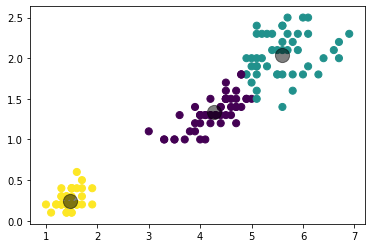

In [9]:
###scatter plot
plt.scatter(x['Petal.Length'],x['Petal.Width'], c = cluster_pred, s = 50)
# centers
centers = model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha = 0.5);

## Inertia value를 이용한 적정 군집수 판단

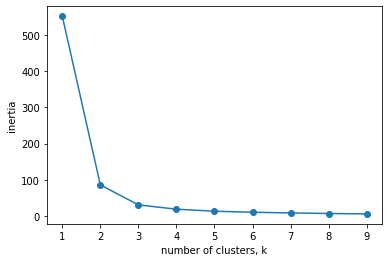

In [11]:
ks = range(1,10)
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters = k)
    model.fit(x)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 커널화된 k-means
- 비선형 경계를 구함|

In [14]:
from sklearn.datasets import make_moons

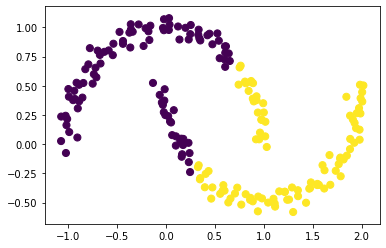

In [15]:
### Ex. data
X,y = make_moons(200,noise=.05,random_state=0)
### k-means
labels = KMeans(2,random_state=0).fit_predict(X)
###scatter plot
plt.scatter(X[:,0],X[:,1],c=labels,s=50)

- 데이터의 고차원 표현을 계산하기 위해 최근접 이웃(nearest_neighbors)의 그래프를 사용하고, k-평균(kmeans)알고리즘을 사용해 레이블을 할당한다.

In [16]:
from sklearn.cluster import SpectralClustering

C:\Users\CPB02GameN\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


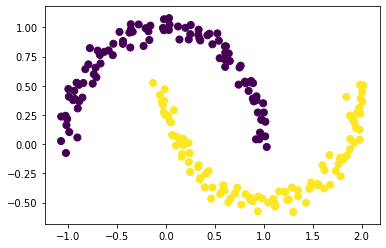

In [17]:
### Spectral Clustering
model = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
### scatter plot
plt.scatter(X[:,0],X[:,1],c=labels, s=50)
